In [4]:
import sys
!{sys.executable} -m pip install librosa
!{sys.executable} -m pip install music21

In [16]:
import librosa
import music21

def infer_time_signature(audio_file):
  
    y, sr = librosa.load(audio_file)
    
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr, onset_envelope=onset_env)
    beat_times = librosa.frames_to_time(beat_frames, sr=sr)
    
    stream = music21.stream.Stream()
    for beat_time in beat_times:
        stream.append(music21.note.Note(beat_time))  
    
    ts = music21.meter.bestTimeSignature(stream)
    
    return ts

In [17]:
audio_file = "C:\\Users\\han1b\\MATLAB Drive\\Published\\EECS 351\\351 project\\Ode-to-joy-melody-piano.mp3"
time_signature = infer_time_signature(audio_file)
print("Inferred time signature:", time_signature)

Inferred time signature: <music21.meter.TimeSignature 94/4>


In [18]:
import librosa

audio_file = librosa.load("C:\\Users\\han1b\\MATLAB Drive\\Published\\EECS 351\\351 project\\Ode-to-joy-melody-piano.mp3")
y, sr = audio_file

tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_times

Estimated tempo: 107.67 beats per minute


array([ 0.16253968,  0.74303855,  1.30031746,  1.85759637,  2.41487528,
        2.9721542 ,  3.52943311,  4.06349206,  4.64399093,  5.17804989,
        5.7353288 ,  6.29260771,  6.84988662,  7.40716553,  7.96444444,
        8.52172336,  9.07900227,  9.63628118, 10.19356009, 10.72761905,
       11.28489796, 11.84217687, 12.39945578, 12.95673469, 13.51401361,
       14.07129252, 14.62857143, 15.18585034, 15.74312925, 16.30040816,
       16.85768707, 17.39174603, 17.94902494, 18.52952381, 19.06358277,
       19.62086168, 20.17814059, 20.7354195 , 21.29269841, 21.84997732,
       22.40725624, 22.96453515, 23.52181406, 24.07909297, 24.63637188,
       25.19365079, 25.75092971, 26.30820862, 26.84226757, 27.39954649,
       27.9568254 , 28.51410431, 29.07138322, 29.62866213, 30.18594104,
       30.74321995, 31.30049887, 31.85777778, 32.41505669, 32.9723356 ,
       33.52961451, 34.06367347, 34.62095238, 35.17823129, 35.7355102 ,
       36.29278912, 36.85006803, 37.40734694, 37.96462585, 38.52

Estimated tempo: 107.67 beats per minute


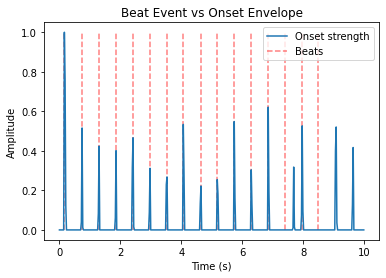

In [7]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

audio_file = "C:\\Users\\han1b\\MATLAB Drive\\Published\\EECS 351\\351 project\\Ode-to-joy-melody-piano.mp3"
y, sr = librosa.load(audio_file, duration=10)

onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median)

tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

beat_times = librosa.frames_to_time(beats, sr=sr)


hop_length = 512
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)

plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.title("Beat Event vs Onset Envelope")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()